In [1]:

import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import lsst.sims.maf.utils as mafUtils
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.plots as plots

# Import the contributed metrics, to get GalaxyCountsMetric
from mafContrib import GalaxyCountsMetric_extended

In [2]:
runName = 'baseline'
dbfile = 'baseline_1exp_pairsmix_10yrs.db'
opsdb = db.OpsimDatabase(dbfile)

In [12]:

nside = 64
filtername = 'g'
sql='filter="%s"' % filtername
slicer = slicers.HealpixSlicer(nside=nside)
metric = GalaxyCountsMetric_extended(nside=nside, filterBand=filtername)
ss = metrics.AreaSummaryMetric(reduce_func=np.sum)
bundle = metricBundles.MetricBundle(metric, slicer, sql,
                                    runName=runName, summaryMetrics=[ss])
bundles = {1: bundle}

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/Users/yoachim/gitRepos/sims_photutils/python/lsst/sims/photUtils/Sed.py:916: DeprecationWarning: Sed.setupCCMab is now deprecated in favor of Sed.setupCCM_ab
  DeprecationWarning)


In [13]:
outDir = 'galaxyCounts'
resultsDb = db.ResultsDb(outDir=outDir)
mb = metricBundles.MetricBundleGroup(bundles, opsdb, outDir=outDir, resultsDb=resultsDb)

Querying database SummaryAllProps with constraint filter="g" for columns ['fieldRA', 'fiveSigmaDepth', 'fieldDec']
Found 241300 visits
Running:  [1]


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/slicers/baseSpatialSlicer.py:108: UserWarning: Warning:  Loading maps but cache on.Should probably set useCache=False in slicer.
  warnings.warn('Warning:  Loading maps but cache on.'
/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/maps/dustMap.py:25: UserWarning: Slicer value of nside (64) different from map value (128), using slicer value
  % (slicePoints['nside'],self.nside ))


Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter="g"" constraint now.
monopole: 304835  dipole: lon: 35.3432, lat: -58.6011, amp: 113948
Plotting complete.


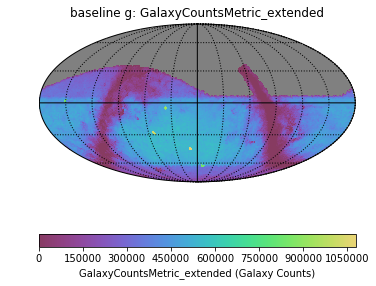

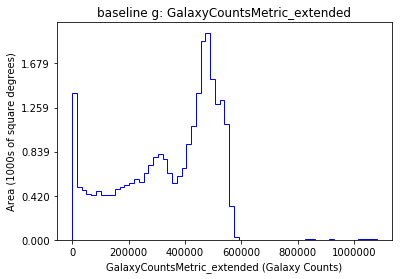

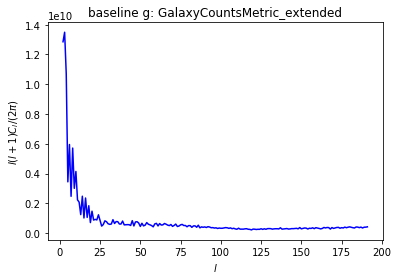

In [14]:
mb.runAll()
mb.plotAll(closefigs=False)

In [15]:
bundles[1].summaryValues['AreaSummary']/1e9

9.5410803556489387